# Descriptive Statistics For "CVE Details" site

## Parts of the work
### 1) run script scrapProducts.py for scraping products  for each year in the range 1999-2019. This script creates many xslx-files (1999_31_5.xlsx, 1999_36_23.xlsx, ... ) for each products: 

    Number	Product		     Product ID	Vendor ID
    1	Debian Linux Debian      36	    23
    2	Linux Kernel Linux	     47	    33
    4	Mac Os X Apple	         156	49
    8	Ubuntu Linux Canonical	 20550	4781
    12	Windows 7 Microsoft	     17153	26
    15	Opensuse Opensuse	     14195	8184
    17	Windows Vista Microsoft	 9591	26
    22	Windows 10 Microsoft	 32238	26
    23	Windows Xp Microsoft	 739	26
    25	Windows 8.1 Microsoft	 26434	26
    28	Mac Os X Server Apple	 2274	49
    34	Enterprise Linux Redhat	 78	    25
    43	Windows 2000 Microsoft	 107	26
    48	Solaris	SUN	             31	    5

In [7]:
# -*- coding: utf-8 -*-
"""
Created on Fri Jan 11 09:37:10 2019

@author: a1
"""
import pandas as pd
import numpy as np
from pandas import ExcelWriter


#create data for analysis (from all xlsx-files)
list_of_dfs=[]


product_vender=[]
choices = ['low', 'medium', 'high']

my_list = [ (36,23), (47, 33), (156, 49), (20550, 4781), (17153, 26), (14195,8184), (9591,26),(32238,26),(739,26), (26434,26), (2274,49),(78	, 25), (107,	26),(31,	5)]
for year in range(1999,2020):         
        for product_id, vender_id in my_list:
             
             fileName=str(year) + "_" + str(product_id) + "_" + str(vender_id) + ".xlsx"
             
             try:
                 dataframe=pd.read_excel(fileName, "CVE Details")
             except:
                 continue
             
             if(len(dataframe.index) == 0):
                 print(fileName)
                 continue
             
             
             # assigning that filename as a new column in the dataframe
             dataframe['filename'] = fileName
             
             # assigning that product_vender as a new column in the dataframe
             dataframe['product_vender'] = str(product_id) + "_" + str(vender_id)
             
             #print(len(dataframe.columns))
             
             # convert columns type  of a DataFram
             dataframe['Publish Date'] = pd.to_datetime(dataframe['Publish Date'])
             dataframe['Update Date'] = pd.to_datetime(dataframe['Update Date'])
             dataframe['CVSS Score'] = pd.to_numeric(dataframe['CVSS Score'])
             
             #new column
             dataframe['days']=dataframe['Update Date'] - dataframe['Publish Date']
             
             
             #classify it, 0-3.9 is low, 4-6.9 is medium, and 7-10 is high
             conditions = [
                 (dataframe['CVSS Score'] > 0) & (dataframe['CVSS Score'] <= 3.9),
                 (dataframe['CVSS Score'] > 3.9) & (dataframe['CVSS Score'] <= 6.9),
                 (dataframe['CVSS Score'] > 6.9) & (dataframe['CVSS Score'] <= 10)]
                 
             #new colum
             dataframe['score level']=np.select(conditions, choices, default='unknown')
             
             #print(dataframe.shape[0])
             
             #remove coluns 6,8,...,15
             #dataframe.drop(dataframe.columns[[6, 8, 9, 10, 11, 12, 13, 14, 15]], axis=1, inplace=True)  # df.columns is zero-based pd.Index 
             
             dataframe.sort_values('Publish Date', inplace=True)             
             
             #print(dataframe.head())
             list_of_dfs.append(dataframe)


  
# Combine a list of dataframes, on top of each other
df = pd.concat(list_of_dfs, ignore_index=True)
df['year'] = df['Publish Date'].dt.year
print(len(df.index))
print(df.head())

writer = ExcelWriter('All_Data_for_Analysis.xlsx')
df.to_excel(writer,'CVE Details',index=False)
writer.save() 
print ("Writing to Excel File : All_Data_for_Analysis.xlsx.")

    

1999_20550_4781.xlsx
1999_17153_26.xlsx
1999_14195_8184.xlsx
1999_9591_26.xlsx
1999_32238_26.xlsx
1999_739_26.xlsx
1999_26434_26.xlsx
1999_2274_49.xlsx
1999_78_25.xlsx
2000_156_49.xlsx
2000_20550_4781.xlsx
2000_17153_26.xlsx
2000_14195_8184.xlsx
2000_9591_26.xlsx
2000_32238_26.xlsx
2000_26434_26.xlsx
2000_2274_49.xlsx
2000_78_25.xlsx
2001_20550_4781.xlsx
2001_17153_26.xlsx
2001_14195_8184.xlsx
2001_9591_26.xlsx
2001_32238_26.xlsx
2001_26434_26.xlsx
2001_2274_49.xlsx
2001_78_25.xlsx
2002_9591_26.xlsx
451
   CVE ID Number Publish Date Update Date Software Type  Vendor       Product  \
0  CVE-1999-0914   1999-01-03  2008-09-09            OS  Debian  Debian Linux   
1  CVE-1999-0389   1999-01-03  2008-09-09            OS  Debian  Debian Linux   
2  CVE-1999-0678   1999-01-17  2008-09-09            OS  Debian  Debian Linux   
3  CVE-1999-0457   1999-01-17  2008-09-09            OS  Debian  Debian Linux   
4  CVE-1999-0373   1999-02-01  2008-09-09            OS  Debian  Debian Linux   

  Ve

 ### 2) run script createGeneralDF.py. This script creates All_Data_for_Analysis.xlsx from xslx-files (1999_31_5.xlsx, 1999_36_23.xlsx, ... ).
 ### 3) run this jupyter notebook for the analysis. The file All_Data_for_Analysis.xlsx from previous step is input file.

## Import modules

In [1]:
# -*- coding: utf-8 -*-
%matplotlib inline
import pandas as pd
import numpy as np
from pandas import ExcelWriter
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

## Read data and create dataframe 

In [3]:
df=pd.read_excel('All_Data_for_Analysis.xlsx', "CVE Details")
print(len(df.index))

451


## Descriptive Statistics

In [4]:
df.head()

,CVE ID Number,Publish Date,Update Date,Software Type,Vendor,Product,Version,CVSS Score,Confidentiality Impact,Integrity Impact,...,Access Complexity,Authentication,Gained Access,Vulnerability Type,Summary Text,filename,product_vender,days,score level,year
0,CVE-1999-0914,1999-01-03,2008-09-09,OS,Debian,Debian Linux,2.0,7.2,Complete,Complete,...,Low,Not required,Admin,Overflow,\tBuffer overflow in the FTP client in the Deb...,1999_36_23.xlsx,36_23,3538,high,1999
1,CVE-1999-0389,1999-01-03,2008-09-09,OS,Debian,Debian Linux,2.0,7.2,Complete,Complete,...,Low,Not required,Admin,Overflow,\tBuffer overflow in the bootp server in the D...,1999_36_23.xlsx,36_23,3538,high,1999
2,CVE-1999-0678,1999-01-17,2008-09-09,OS,Debian,Debian Linux,4.0,5.0,Partial,None,...,Low,Not required,None,NaN,\tA default configuration of Apache on Debian ...,1999_36_23.xlsx,36_23,3524,medium,1999
3,CVE-1999-0457,1999-01-17,2008-09-09,OS,Debian,Debian Linux,2.0,7.2,Complete,Complete,...,Low,Not required,Admin,Gain privileges,\tLinux ftpwatch program allows local users to...,1999_36_23.xlsx,36_23,3524,high,1999
4,CVE-1999-0373,1999-02-01,2008-09-09,OS,Debian,Debian Linux,2.0,7.2,Complete,Complete,...,Low,Not required,Admin,Execute CodeOverflow,"\tBuffer overflow in the ""Super"" utility in De...",1999_36_23.xlsx,36_23,3509,high,1999


In [5]:
df.tail()

,CVE ID Number,Publish Date,Update Date,Software Type,Vendor,Product,Version,CVSS Score,Confidentiality Impact,Integrity Impact,...,Access Complexity,Authentication,Gained Access,Vulnerability Type,Summary Text,filename,product_vender,days,score level,year
446,CVE-2002-1871,2002-12-31,2018-10-30,OS,SUN,Sunos,5.8,7.2,Complete,Complete,...,Low,Not required,Admin,NaN,\tpkgadd in Sun Solaris 2.5.1 through 8 instal...,2002_31_5.xlsx,31_5,5783,high,2002
447,CVE-2002-1980,2002-12-31,2018-10-30,OS,SUN,Sunos,5.8,7.2,Complete,Complete,...,Low,Not required,Admin,Execute CodeOverflow,\tBuffer overflow in Volume Manager daemon (vo...,2002_31_5.xlsx,31_5,5783,high,2002
448,CVE-2002-2089,2002-12-31,2008-09-05,OS,SUN,Solaris,9.0,4.6,Partial,Partial,...,Low,Not required,User,Execute CodeOverflow,\tBuffer overflow in rcp in Solaris 9.0 allows...,2002_31_5.xlsx,31_5,2076,medium,2002
449,CVE-2002-2197,2002-12-31,2018-10-30,OS,SUN,Sunos,5.8,7.2,Complete,Complete,...,Low,Not required,Admin,Denial Of Service,\tUnknown vulnerability in Sun Solaris 8.0 all...,2002_31_5.xlsx,31_5,5783,high,2002
450,CVE-2002-2203,2002-12-31,2018-10-30,OS,SUN,Sunos,5.7,4.9,Complete,None,...,Low,Not required,None,NaN,\tUnknown vulnerability in the System Serial C...,2002_31_5.xlsx,31_5,5783,medium,2002


In [6]:
# summary statistics of character column
df.describe(include=['object'])

,CVE ID Number,Software Type,Vendor,Product,Version,Confidentiality Impact,Integrity Impact,Availibility Impact,Access Complexity,Authentication,Gained Access,Vulnerability Type,Summary Text,filename,product_vender,score level
count,451,451,451,451,315,451,451,451,451,451,451,300,451,451,451,451
unique,412,2,30,39,79,3,3,3,3,1,3,19,412,24,8,3
top,CVE-2002-2185,OS,Microsoft,Sunos,5.8,Partial,Partial,Partial,Low,Not required,None,Denial Of Service,\tThe Internet Group Management Protocol (IGMP...,2001_107_26.xlsx,107_26,high
freq,3,422,175,89,39,177,162,214,434,451,245,98,3,43,133,206


In [8]:
# summary statistics of character column 
df.describe(include='all')

,CVE ID Number,Publish Date,Update Date,Software Type,Vendor,Product,Version,CVSS Score,Confidentiality Impact,Integrity Impact,...,Access Complexity,Authentication,Gained Access,Vulnerability Type,Summary Text,filename,product_vender,days,score level,year
count,451,451,451,451,451,451,315,451.000000,451,451,...,451,451,451,300,451,451,451,451,451,451.000000
unique,412,180,21,2,30,39,79,NaN,3,3,...,3,1,3,19,412,24,8,NaN,3,NaN
top,CVE-2002-2185,2002-12-31 00:00:00,2018-10-12 00:00:00,OS,Microsoft,Sunos,5.8,NaN,Partial,Partial,...,Low,Not required,None,Denial Of Service,\tThe Internet Group Management Protocol (IGMP...,2001_107_26.xlsx,107_26,NaN,high,NaN
freq,3,34,109,422,175,89,39,NaN,177,162,...,434,451,245,98,3,43,133,NaN,206,NaN
first,NaN,1999-01-01 00:00:00,2008-09-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2002-12-31 00:00:00,2018-10-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.831486,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5357 days 12:39:54.678492,NaN,2000.776053
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.340149,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1493 days 14:23:41.386407,NaN,1.139572
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.200000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2075 days 00:00:00,NaN,1999.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.600000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5225 days 00:00:00,NaN,2000.000000


In [9]:
df['score level'].describe()

count      451
unique       3
top       high
freq       206
Name: score level, dtype: object

In [10]:
df['days'].describe()

count                          451
mean     5357 days 12:39:54.678492
std      1493 days 14:23:41.386407
min             2075 days 00:00:00
25%             5225 days 00:00:00
50%             5862 days 00:00:00
75%             6294 days 00:00:00
max             7236 days 00:00:00
Name: days, dtype: object

In [12]:
df['CVSS Score'].describe()

count    451.000000
mean       5.831486
std        2.340149
min        1.200000
25%        4.600000
50%        5.000000
75%        7.500000
max       10.000000
Name: CVSS Score, dtype: float64

## Plots

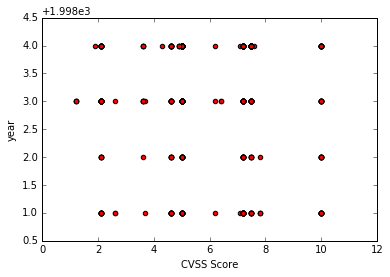

In [13]:
df.plot(kind='scatter',x='CVSS Score',y='year',color='red')

KeyError: 'days'

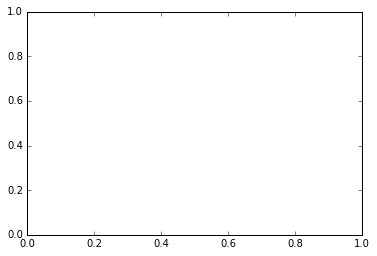

In [14]:
df.plot(kind='scatter',x='year',y='days',color='red')

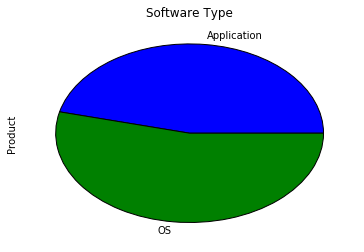

In [15]:
df.groupby('Software Type')['Product'].nunique().plot(kind='pie')
plt.title('Software Type')

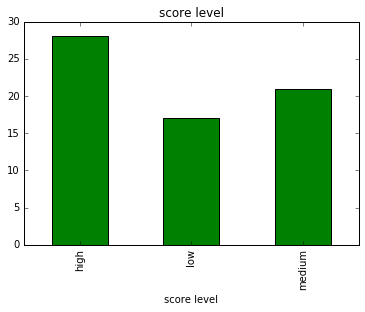

In [16]:
df.groupby('score level')['Product'].nunique().plot(kind='bar',color='green')
plt.title('score level')

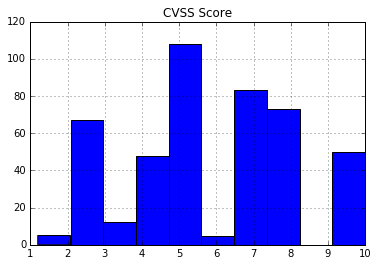

In [17]:
df['CVSS Score'].hist()
plt.title('CVSS Score')

In [18]:
df['Vendor'].nunique()

30

In [19]:
#List unique values in the df['Vendo'] column
df.Vendor.unique()

array(['Debian', 'Washington University', 'Suse', 'Linux', 'Todd Miller',
       'Earl Hood', 'Redhat', 'SGI', 'Paul Kranenburg', 'Apple',
       'Microsoft', 'SUN', 'Turbolinux', 'Freebsd', 'Trustix',
       'Slackware', 'Sam Lantinga', 'Mandrakesoft', 'Zope', 'Proftpd',
       'Progeny', 'University Of Cambridge', 'Immunix', 'John Bovey',
       'Oracle', 'Netbsd', 'Easy Software Products', 'Winzip',
       'Xi Graphics', 'Xfree86 Project'], dtype=object)

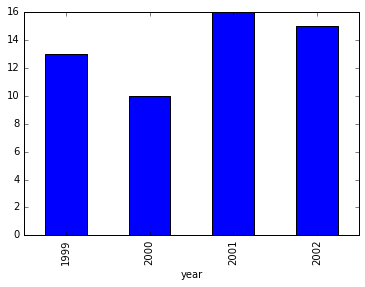

In [20]:
df.groupby('year')['Vendor'].nunique().plot(kind='bar')

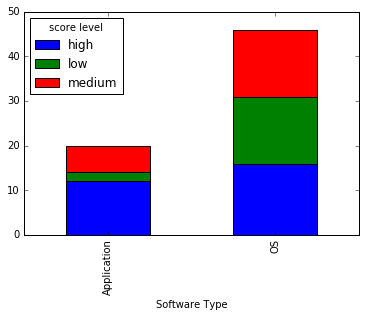

In [21]:
df.groupby(['Software Type', 'score level'])['Product'].nunique().unstack().plot(kind='bar',stacked=True)

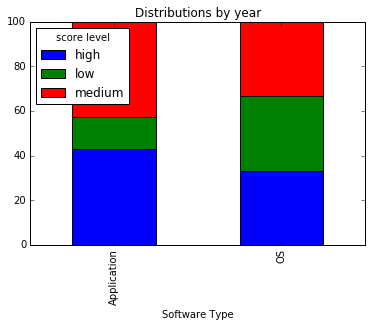

In [22]:
#the distributions, not raw amounts
df.groupby(['Software Type','score level'])['year'].nunique().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.title('Distributions by year')

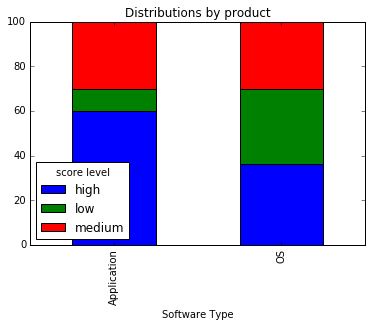

In [23]:
#the distributions, not raw amounts
df.groupby(['Software Type','score level'])['Vendor'].nunique().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.title('Distributions by product')